# Basic scan (& plot) of scaler *vs.* motor

**note**:  This tutorial expects to find an EPICS IOC on the local network configured as a synApps [`xxx`](https://github.com/epics-modules/xxx) IOC with prefix `sky:`.  A docker container is available to provide this IOC.  See this URL for instructions:  https://github.com/prjemian/epics-docker/blob/master/n3_synApps/README.md

In [1]:
import matplotlib

matplotlib.use('nbAgg')  # i.e. %matplotlib notebook
import matplotlib.pyplot
matplotlib.use('nbAgg', force=True)  # i.e. %matplotlib notebook

from bluesky import RunEngine
RE = RunEngine({})

# Set up SupplementalData.
from bluesky import SupplementalData
sd = SupplementalData()
RE.preprocessors.append(sd)

# # Set up a Broker.
# from databroker import Broker
# db = Broker.named("mongodb_config")

# # and subscribe it to the RunEngine
# RE.subscribe(db.insert)

# Register bluesky IPython magics.
from bluesky.magics import BlueskyMagics
get_ipython().register_magics(BlueskyMagics)

# Set up the BestEffortCallback.
from bluesky.callbacks.best_effort import BestEffortCallback
bec = BestEffortCallback()
RE.subscribe(bec)
peaks = bec.peaks

# Import matplotlib and put it in interactive mode.
import matplotlib.pyplot as plt
plt.ion()

# Make plots update live while scans run.
from bluesky.utils import install_kicker
install_kicker()


import bluesky.plans as bp

from bluesky.callbacks import LiveTable
from bluesky.callbacks import LivePlot
from bluesky.callbacks.best_effort import BestEffortCallback

In [2]:
from ophyd import EpicsMotor
from ophyd.scaler import ScalerCH

P = "sky:"
m1 = EpicsMotor(f"{P}m1", name="m1")
scaler = ScalerCH(f"{P}scaler1", name="scaler")
m1.wait_for_connection()
scaler.wait_for_connection()

In [3]:
scaler.channels.chan01.chname.put("clock")
scaler.channels.chan02.chname.put("I0")
scaler.channels.chan03.chname.put("scint")

scaler.preset_time.put(0.4)

scaler.select_channels(None)
scaler.read()

OrderedDict([('clock', {'value': 0.0, 'timestamp': 631152000.0}),
             ('I0', {'value': 0.0, 'timestamp': 631152000.0}),
             ('scint', {'value': 0.0, 'timestamp': 631152000.0}),
             ('diode', {'value': 0.0, 'timestamp': 631152000.0}),
             ('I0Mon', {'value': 0.0, 'timestamp': 631152000.0}),
             ('ROI1', {'value': 0.0, 'timestamp': 631152000.0}),
             ('ROI2', {'value': 0.0, 'timestamp': 631152000.0}),
             ('scaler_time', {'value': 0.0, 'timestamp': 631152000.0})])



Transient Scan ID: 1     Time: 2020-05-06 14:10:35
Persistent Unique Scan ID: '9b021852-6ee0-4efc-ad96-b9f0ee78a86b'
New stream: 'primary'


<IPython.core.display.Javascript object>


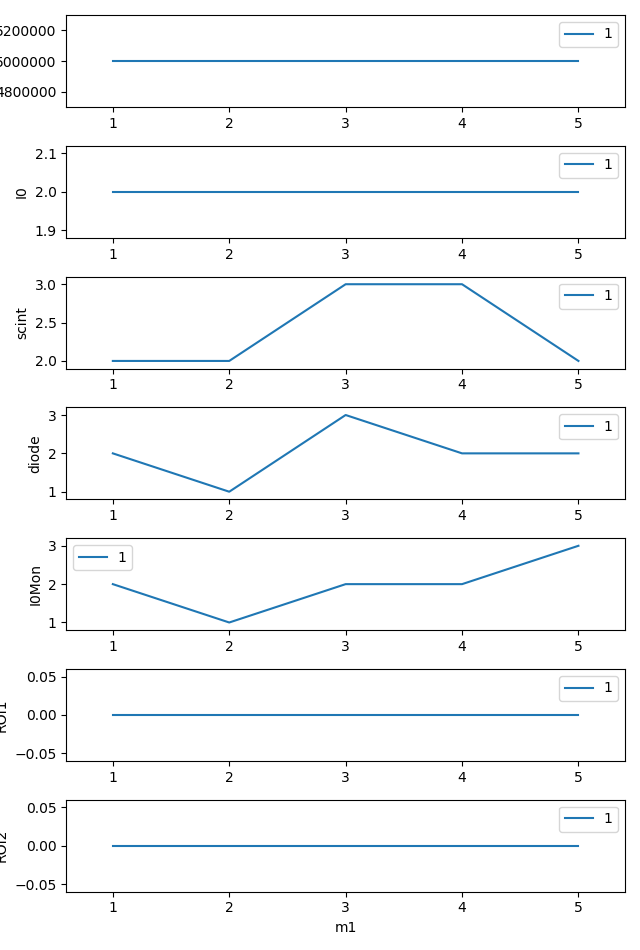

+-----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+
|   seq_num |       time |         m1 |      clock |         I0 |      scint |      diode |      I0Mon |       ROI1 |       ROI2 |
+-----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+


+-----------+------------+------------+------------------+------------+------------+------------+------------+------------+------------+-------------+------------+
|   seq_num |       time |         m1 | m1_user_setpoint |         I0 |      I0Mon |       ROI1 |       ROI2 |      clock |      diode | scaler_time |      scint |
+-----------+------------+------------+------------------+------------+------------+------------+------------+------------+------------+-------------+------------+
|         1 | 14:10:37.3 |    1.00000 |    5000000 |          2 |          2 |          2 |          2 |         

/home/mintadmin/Apps/anaconda/envs/bluesky_2020_5/lib/python3.7/site-packages/bluesky/callbacks/fitting.py:167: RuntimeWarning: invalid value encountered in double_scalars
  for dir in range(input.ndim)]


('9b021852-6ee0-4efc-ad96-b9f0ee78a86b',)

In [4]:
RE(bp.scan([scaler], m1, 1, 5, 5), LiveTable([m1, scaler]))